In [1]:
import ROOT
import glob
import numpy as np
import pandas as pd

# standard system modules
import os, sys

# to plot pixelized images
import imageio.v3 as im

# standard module for high-quality plots
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

# standard research-level machine learning toolkit from Meta (FKA: FaceBook)
import torch
import torch.nn as nn

import roottotext

# https://www.mathworks.com/help/vision/ug/object-detection-using-deep-learning.html

Welcome to JupyROOT 6.26/10


## Trying to find centroids of groups

In [26]:
import scipy.ndimage as ndi
from skimage.feature import peak_local_max
import matplotlib.colors as colors
def load_data(path):
    runs = sorted(glob.glob(os.path.join(path, '*.txt')))
    datalist = [np.loadtxt(run, unpack = False) for run in runs]
    return datalist

def get_particle_class(label):
    """Gets the class name for a given label.
    
    Arguments:
        label (int): The integer target label.
        
    Returns:
        The name of the class that corresponds to the given label.
    """
    return ['deuteron','alpha','triton'][label]


SLABdat = load_data(path = './SLABtxt/7.3kG/')

smoothed_data = ndi.gaussian_filter((SLABdat[0][:,0],SLABdat[0][:,1]), sigma=0.1)  # adjust sigma for smoothness

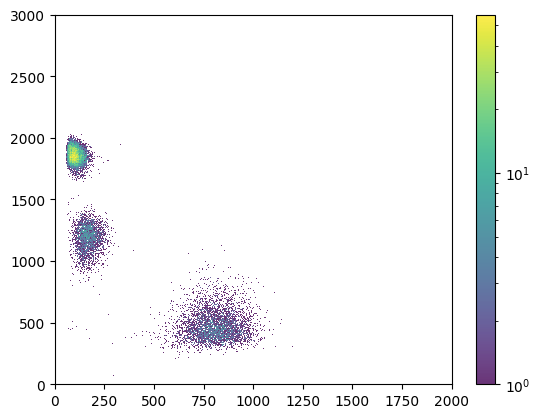

In [94]:
fig, ax = plt.subplots()
hist, xedges, yedges, image = ax.hist2d(smoothed_data[0],smoothed_data[1], bins = [512,512], range = [[0,2000],[0,3000]],cmap = 'viridis', norm = colors.LogNorm(), alpha = 0.8)
plt.colorbar(image, ax = ax)
# plt.scatter(91,1825, facecolor = 'red')
# plt.hist2d(SLABdat[0][:,0],SLABdat[0][:,1], bins = [512,512], range = [[0,2000],[0,3000]],cmap = 'viridis', norm = colors.LogNorm(), alpha = 0.8)
# plt.show()

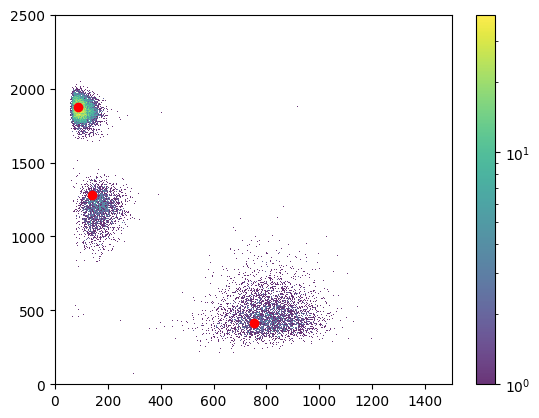

In [97]:
# Find peaks in smoothed data 

# print(x_peak_positions,y_peak_positions)
fig, ax = plt.subplots()
hist, xedges, yedges, image = ax.hist2d(smoothed_data[0],smoothed_data[1], bins = [512,512], range = [[0,1500],[0,2500]],cmap = 'viridis', norm = colors.LogNorm(), alpha = 0.8)
plt.colorbar(image, ax = ax)

peaks = peak_local_max(hist, threshold_abs = 2, num_peaks = 3,min_distance= 20)
x_peak_positions = xedges[peaks[:, 0]] + (xedges[1] - xedges[0]) / 2
y_peak_positions = yedges[peaks[:, 1]] + (yedges[1] - yedges[0]) / 2

peak_pos = np.column_stack((x_peak_positions,y_peak_positions))
plt.scatter(peak_pos[:,0],peak_pos[:,1], facecolor = 'red')

# Preparing training and validation datasets
1. Load datasets from each run.
2. Convert data to PyTorch tensors and split into training, testing, and validation sets.
3. Change shape of tensors from (N,H,W,C) to (N,C,H,W).
4. Move them to computational device.



In [19]:
def load_data(path):
    runs = sorted(glob.glob(os.path.join(path, '*.txt')))
    datalist = [np.loadtxt(run, unpack = False) for run in runs]
    return datalist

def get_particle_class(label):
    """Gets the class name for a given label.
    
    Arguments:
        label (int): The integer target label.
        
    Returns:
        The name of the class that corresponds to the given label.
    """
    return ['deuteron','triton','alpha'][label]


SLABlist = load_data(path = './SLABtxt/7.3kG/')

In [17]:
n_train = 5 # number of histograms for training set
n_test = 5 # number of histograms for testing set
n_valid = len(SLABlist) - n_train - n_test # number of histograms for validation set

print("number of histograms for training:   %10d" % n_train)
print("number of histograms for testing:    %10d" % n_test)
print("number of histograms for validation: %10d" % n_valid)

# split and convert to tensors

train_x, X = torch.Tensor(SLABlist[:n_train]), SLABlist[n_train:]
train_y, Y = torch.tensor(SLABlist[:n_train], dtype=int), SLABlist[n_train:]

test_x, valid_x = torch.Tensor(X[:n_test]), torch.Tensor(X[n_test:])
test_y, valid_y = torch.tensor(Y[:n_test], dtype=int), torch.tensor(Y[n_test:], dtype=int)

# change shape ( (N, H, W, C) => (N, C, H, W) ) and send to computational device

train_x = train_x.transpose(2,3).transpose(1,2).to(DEVICE)
test_x  = test_x.transpose(2,3).transpose(1,2).to(DEVICE)
valid_x = valid_x.transpose(2,3).transpose(1,2).to(DEVICE)

print()
print(train_x.shape)
print(train_y.shape)
print()

print("number of images for training:   %10d, %10d" % (len(train_x), len(train_y)))
print("number of images for testing:    %10d, %10d" % (len(test_x),  len(test_y)))
print("number of images for validation: %10d, %10d" % (len(valid_x), len(valid_y)))








(40681, 2)